In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



character(0)

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#import">Import the Data</a></li>
        <li><a href="#data_preprocessing">Data Preprocessing</a></li>
        <li><a href="#eda">Exploratory Data Analysis</a></li>
    </ol>
</div>
<br>
<hr>

<div id= 'import'>
    <h2>Import the Data</h2>
</div>

In [2]:
netflix <- read.csv("netflix.csv", header= TRUE)
head(netflix)

,Title,Genre,Language,Premiere,Runtime,Seasons
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Stranger Things,Science fiction/horror,English,"July 15, 2016",42–78 min,"3 seasons, 25 episodes"
2,The Crown,Historical drama,English,"November 4, 2016",47–61 min,"4 seasons, 40 episodes"
3,Ozark,Crime drama,English,"July 21, 2017",50–80 min,"4 seasons, 37 episodes"
4,The Umbrella Academy,Superhero action,English,"February 15, 2019",40–60 min,"2 seasons, 20 episodes"
5,Black Summer,Apocalyptic fiction drama,English,"April 11, 2019",21–58 min,"2 seasons, 16 episodes"
6,Raising Dion,Superhero/Science fiction drama,English,"October 4, 2019",37–51 min,"2 seasons, 17 episodes"


In [3]:
str(netflix)

'data.frame':	363 obs. of  6 variables:
 $ Title   : chr  "Stranger Things" "The Crown" "Ozark" "The Umbrella Academy" ...
 $ Genre   : chr  "Science fiction/horror" "Historical drama" "Crime drama" "Superhero action" ...
 $ Language: chr  "English" "English" "English" "English" ...
 $ Premiere: chr  "July 15, 2016" "November 4, 2016" "July 21, 2017" "February 15, 2019" ...
 $ Runtime : chr  "42–78 min" "47–61 min" "50–80 min" "40–60 min" ...
 $ Seasons : chr  "3 seasons, 25 episodes" "4 seasons, 40 episodes" "4 seasons, 37 episodes" "2 seasons, 20 episodes" ...


<div id= 'data_preprocessing'>
    <h2>Data Preprocessing</h2>
</div>

In [4]:
library(dplyr)

In [5]:
# Converting into a Date part
netflix$Premiere <- as.Date(netflix$Premiere, format= "%B %d, %Y")

In [6]:
# Accessing Date part from netflix$Premiere and storing it in new dataframe
netflix$Year <- as.numeric(format(netflix$Premiere,'%Y'))

In [7]:
# Dropping the Premiere column
netflix <- select(netflix, -Premiere)

In [8]:
#table(netflix$Genre)

In [9]:
#list(netflix$Genre)

In [10]:
Thriller <- c('Psychological thriller', 'Thriller', 'Dark comedy thriller', 'Dark comedy thriller', 'Crime thriller', 'Romantic thriller', 
              'Fantasy thriller', 'Survival thriller', 'Science fiction thriller', 'Suspense thriller/Melodrama', 'Teen mystery thriller')

Telenovela <- c('Telenovela')

Crime <- c('Crime', 'True crime', 'Sport/True crime', 'Crime drama')

Horror <- c('Fantasy drama/Supernatural horror', 'Found footage horror', 'CG animation/Horror', 'Fantasy horror', 'Horror')

Sitcom <- c('Sitcom')

Comedy <- c('Comedy', 'Sketch comedy', 'Workplace comedy', 'Children\'s comedy', 'Coming-of-age comedy', 'Medieval fantasy comedy', 
            'Educational/Comedy', 'Romantic comedy', 'Romantic comedy/Musical', 'Dark comedy', 'Workplace dramedy', 'Period dramedy', 'Dramedy', 
            'Musical comedy', 'Crime comedy/Variety show', 'Martial arts/Action dramedy', 'Comedy drama')

Drama <- c('Historical drama', 'Apocalyptic fiction drama', 'Coming-of-age drama', 'Teen drama', 'Detective drama', 'Drama', 'Comedy-drama', 
           'Historical period drama', 'Black comedy-drama', 'Coming-of-age comedy-drama', 'Supernatural drama', 'Melodrama', 'Crime teen drama',
           'Science fiction comedy-drama', 'Young adult mystery drama', 'Police procedural', 'Military drama', 'Fantasy superhero drama', 
           'Teen musical comedy-drama', 'Mystery teen drama')

ScienceFiction <- c('Science fiction/horror', 'Science fiction', 'Science fiction/Tokusatsu', 'Coming-of-age science fiction', 'Science-fiction', 
                    'Science fiction/Superhero', 'Superhero/Science fiction drama')

Fantasy <- c('Fantasy', 'Teen drama fantasy', 'Science fantasy', 'Fantasy/Action', 'Dark fantasy/Action', 'Historical fantasy/Action', 
             'Dark fantasy/Crime', 'Fantasy drama')

RealityShow <- c('Crime comedy/Reality show', 'Crime comedy/Reality show', 'Makeover reality', 'Baking competition', 'Reality', 'Prank show', 
                 'Music competition', 'Reality competition', 'Dating show', 'Game show', 'Travel reality', 'Reality show', 'Docu-reality', 
                 'Talk show')

Mockumentary <- c('Mockumentary')

Documentary <- c('Docuseries', 'Travel documentary', 'Nature documentary', 'Docu-soap', 'Nature docuseries')

Sport <- c('Sport')

Educational <- c('Educational')  

Anime <- c('Anime', 'Animation', 'Animated science fiction fantasy', 'Adult animated horror comedy', 'Animated science fiction fantasy')

Romance <- c('Historical romance', 'Romantic drama')

Action <- c('Superhero action', 'Superhero live-action animation mix', 'Action', 'Martial arts', 'Action drama')

Aftershow <- c('Aftershow')

Mecha.Kaiju <- c('Mecha/Kaiju')

AnthologySeries <- c('Anthology series', 'Anthology', 'Teen mystery thriller anthology', 'Teen mystery thriller anthology')

AwaitingRelease <- c('Awaiting release')

In [ ]:
genre <- function(Genre) {
    if(Genre %in% Thriller) {
        return('Thriller')
    } else if(Genre %in% Telenovela) {
        return('Telenovela')
    } else if(Genre %in% Crime) {
        return('Crime')
    } else if(Genre %in% Horror) {
        return('Horror')
    } else if(Genre %in% Sitcom) {
        return('Sitcom')
    } else if(Genre %in% Comedy) {
        return('Comedy')
    } else if(Genre %in% Drama) {
        return('Drama')
    } else if(Genre %in% ScienceFiction) {
        return('Science Fiction')
    } else if(Genre %in% Fantasy) {
        return('Fantasy')
    } else if(Genre %in% RealityShow) {
        return('Reality Show')
    } else if(Genre %in% Mockumentary) {
        return('Mockumentary')
    } else if(Genre %in% Documentary) {
        return('Documentary')
    } else if(Genre %in% Sport) {
        return('Sport')
    } else if(Genre %in% Educational) {
        return('Educational')
    } else if(Genre %in% Anime) {
        return('Anime')
    } else if(Genre %in% Romance) {
        return('Romance')
    } else if(Genre %in% Action) {
        return('Action')
    } else if(Genre %in% Aftershow) {
        return('Aftershow')
    } else if(Genre %in% Mecha.Kaiju) {
        return('Mecha Kaiju')
    } else if(Genre %in% AnthologySeries) {
        return('Anthology Series')
    } else if (Genre %in% AwaitingRelease){
        return('Awaiting Release')
    } else {
        return('Genre Not Specified')
    }
}
        
netflix$Genre <- sapply(netflix$Genre, genre)

In [11]:
table(netflix$Genre)


                                                                 Action 
                                 37                                   2 
                       Action drama        Adult animated horror comedy 
                                  1                                   1 
                          Aftershow    Animated science fiction fantasy 
                                  1                                   1 
                          Animation                               Anime 
                                  2                                   1 
                          Anthology                    Anthology series 
                                  1                                   4 
          Apocalyptic fiction drama                    Awaiting release 
                                  1                                  14 
                 Baking competition                  Black comedy-drama 
                                  3               

In [12]:
head(netflix, 20)

,Title,Genre,Language,Runtime,Seasons,Year
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,Stranger Things,Science fiction/horror,English,42–78 min,"3 seasons, 25 episodes",2016
2,The Crown,Historical drama,English,47–61 min,"4 seasons, 40 episodes",2016
3,Ozark,Crime drama,English,50–80 min,"4 seasons, 37 episodes",2017
4,The Umbrella Academy,Superhero action,English,40–60 min,"2 seasons, 20 episodes",2019
5,Black Summer,Apocalyptic fiction drama,English,21–58 min,"2 seasons, 16 episodes",2019
6,Raising Dion,Superhero/Science fiction drama,English,37–51 min,"2 seasons, 17 episodes",2019
7,Virgin River,Romantic drama,English,40–49 min,"3 seasons, 30 episodes",2019
8,The Witcher,Fantasy drama,English,47–67 min,"2 seasons, 16 episodes",2019
9,Locke & Key,Fantasy drama/Supernatural horror,English,40–56 min,"2 seasons, 20 episodes",2020


In [13]:
library(stringr)
# Seasons
netflix$Season <- word(string = netflix$Seasons, start = 1, end = 1)
netflix$Season <- sapply(netflix$Season, factor)

# Episodes
netflix$Episodes <- word(string = netflix$Seasons, start = 3, end = 3)
netflix$Episodes <- as.integer(netflix$Episodes)

In [14]:
# Drop Seasons column
netflix <- select(netflix, -Seasons)

In [15]:
# Changing column name
colnames(netflix)[6] <- 'Seasons'

In [16]:
head(netflix)

,Title,Genre,Language,Runtime,Year,Seasons,Episodes
,<chr>,<chr>,<chr>,<chr>,<dbl>,<fct>,<int>
1,Stranger Things,Science fiction/horror,English,42–78 min,2016,3,25
2,The Crown,Historical drama,English,47–61 min,2016,4,40
3,Ozark,Crime drama,English,50–80 min,2017,4,37
4,The Umbrella Academy,Superhero action,English,40–60 min,2019,2,20
5,Black Summer,Apocalyptic fiction drama,English,21–58 min,2019,2,16
6,Raising Dion,Superhero/Science fiction drama,English,37–51 min,2019,2,17


In [17]:
subset(netflix, is.na(netflix$Episodes))

,Title,Genre,Language,Runtime,Year,Seasons,Episodes
,<chr>,<chr>,<chr>,<chr>,<dbl>,<fct>,<int>
29,Awaiting release,Awaiting release,English,Awaiting release,NA,Awaiting,NA
30,The Last Bus[27],Science fiction,English,TBA,2022,TBA,NA
31,Anatomy of a Scandal[29],Anthology series,English,TBA,2022,6,NA
51,Awaiting release,Awaiting release,English,Awaiting release,NA,Awaiting,NA
52,Eternally Confused and Eager for Love,Comedy-drama,English,TBA,2022,TBA,NA
53,Super PupZ[41],Children's comedy,English,TBA,2022,TBA,NA
65,Awaiting release,Awaiting release,Awaiting release,Awaiting release,NA,Awaiting,NA
81,Awaiting release,Awaiting release,Awaiting release,Awaiting release,NA,Awaiting,NA
82,Kotaro Lives Alone[55],Comedy,Japanese,TBA,2022,TBA,NA


After observations in the dataframe, it is seen that it contains some unreleased as well as some __Awaiting Release__ rows which contains NA values. As it is Awaiting Release and contains NA values in `Episodes` and `Season` columns, we will drop those columns

In [18]:
# Deleting the NA Values 
netflix <- na.omit(netflix)

In [19]:
sum(is.na(netflix))

[1] 0

Removed all the NA values from the datset

In [20]:
netflix[netflix$Runtime == 'TBA', ]

,Title,Genre,Language,Runtime,Year,Seasons,Episodes
,<chr>,<chr>,<chr>,<chr>,<dbl>,<fct>,<int>
66,Human Resources[47],Comedy,English,TBA,2022,1,10
115,Team Zenko Go,,English,TBA,2022,1,12
116,Transformers: Botbots[68],,English,TBA,2022,1,10
117,Trivia Quest[71],,English,TBA,2022,1,30
176,Cracow Monsters[92],Fantasy drama,English,TBA,2022,1,8
316,Life After Death with Tyler Henry[149],Reality,English,TBA,2022,1,9
343,Tiger & Bunny (season 2),Anime,Japanese,TBA,2022,1,25


We have to drop the rows having no data on the Runtime of that particular show as it is yet to be released.

In [21]:
netflix <- netflix[netflix$Runtime != 'TBA', ]

In [22]:
# Lastly, for Runtime column take the avg of the values
netflix$mRuntime <- word(netflix$Runtime, start= 1, end= 1)

netflix$minRuntime <- word(netflix$mRuntime, start= 1, end= 1, sep= fixed("–"))
netflix$minRuntime <- as.integer(netflix$minRuntime) # Convert to integer

if(!('–' %in% netflix$mRuntime)) {
    netflix$maxRuntime <- word(netflix$mRuntime, start= 1, end= 1, sep= fixed("–"))
} else {
    netflix$maxRuntime <- word(netflix$mRuntime, start= 2, end= 2, sep= fixed("–"))
}
netflix$maxRuntime <- as.integer(netflix$maxRuntime) # Convert to integer

In [23]:
# Creating a new column AvgRuntime
netflix <- mutate(netflix, AvgRuntime= (minRuntime + maxRuntime)/2)
netflix$AvgRuntime <- as.integer(netflix$AvgRuntime) # Converting to integer

In [24]:
# Dropping the unnecessary columns
netflix <- select(netflix, -Runtime, -mRuntime, -minRuntime, -maxRuntime)

In [25]:
netflix$Genre <- factor(netflix$Genre)
netflix$Language <- sapply(netflix$Language, factor)
netflix$Year <- factor(netflix$Year)

In [26]:
table(netflix$Language)


   English    Italian   Japanese  Icelandic      Tamil       Thai      Dutch 
       258          2         13          1          1          2          2 
Portuguese    Kannada    Spanish     Korean      Hindi     Arabic     German 
         6          1         17          6          2          2          1 
    French     Polish 
         1          2 

In [27]:
subset(netflix, netflix$Genre == 'Awaiting Release')

Title,Genre,Language,Year,Seasons,Episodes,AvgRuntime
<chr>,<fct>,<fct>,<fct>,<fct>,<int>,<int>


In [28]:
# View the head of the final dataset
head(netflix, 10)

,Title,Genre,Language,Year,Seasons,Episodes,AvgRuntime
,<chr>,<fct>,<fct>,<fct>,<fct>,<int>,<int>
1,Stranger Things,Science fiction/horror,English,2016,3,25,42
2,The Crown,Historical drama,English,2016,4,40,47
3,Ozark,Crime drama,English,2017,4,37,50
4,The Umbrella Academy,Superhero action,English,2019,2,20,40
5,Black Summer,Apocalyptic fiction drama,English,2019,2,16,21
6,Raising Dion,Superhero/Science fiction drama,English,2019,2,17,37
7,Virgin River,Romantic drama,English,2019,3,30,40
8,The Witcher,Fantasy drama,English,2019,2,16,47
9,Locke & Key,Fantasy drama/Supernatural horror,English,2020,2,20,40


In [29]:
str(netflix)

'data.frame':	317 obs. of  7 variables:
 $ Title     : chr  "Stranger Things" "The Crown" "Ozark" "The Umbrella Academy" ...
 $ Genre     : Factor w/ 106 levels "","Action","Action drama",..: 81 49 24 88 10 90 75 41 42 19 ...
 $ Language  : Factor w/ 16 levels "English","Italian",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Year      : Factor w/ 8 levels "2015","2016",..: 2 2 3 5 5 5 5 5 6 6 ...
 $ Seasons   : Factor w/ 10 levels "3","4","2","1",..: 1 2 2 3 3 3 1 3 3 3 ...
 $ Episodes  : int  25 40 37 20 16 17 30 16 20 20 ...
 $ AvgRuntime: int  42 47 50 40 21 37 40 47 40 42 ...
 - attr(*, "na.action")= 'omit' Named int [1:39] 29 30 31 51 52 53 65 81 82 83 ...
  ..- attr(*, "names")= chr [1:39] "29" "30" "31" "51" ...


<div id= 'eda'>
    <h2>Exploratory Data Analysis</h2>
</div>

In [30]:
library(ggplot2)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



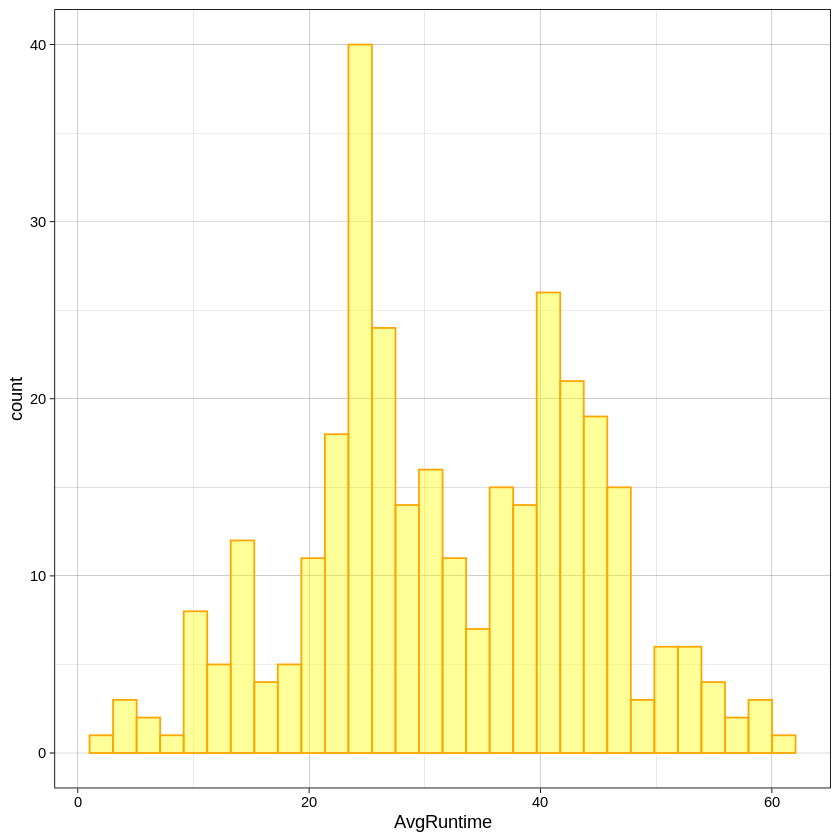

In [31]:
ggplot(netflix, aes(AvgRuntime)) + geom_histogram(color= 'orange', fill= 'yellow', alpha= .4) + theme_linedraw()

The highest `AvgRuntime` is about 25 minutes for about 40 shows and about 42-45 minutes for 26 shows. <br>
It's interesting to see shows having runtime of less than 55 minutes!

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



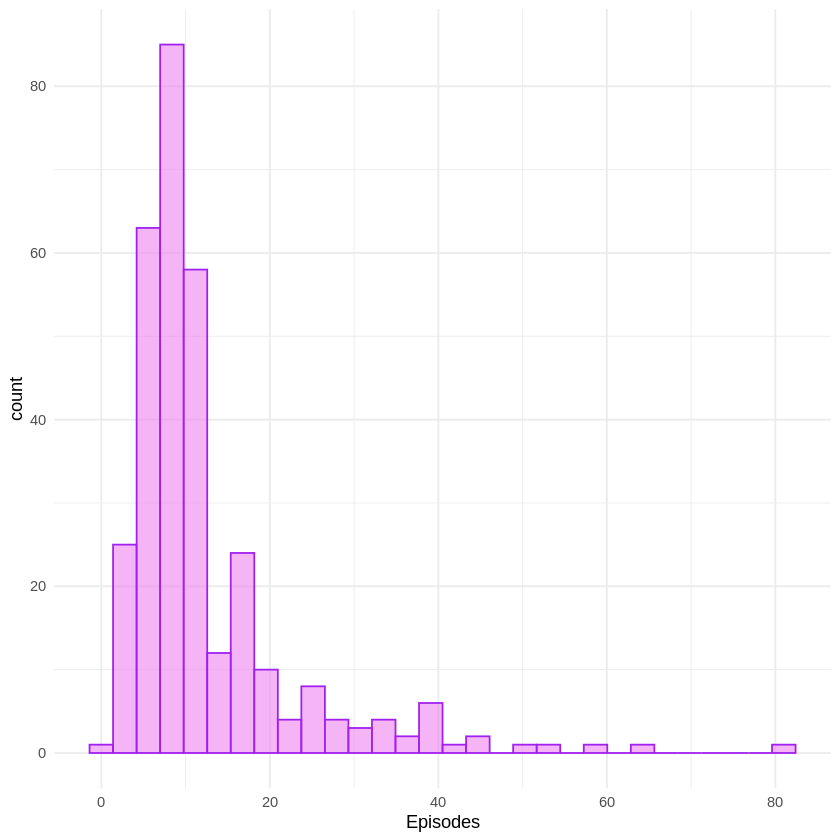

In [32]:
ggplot(netflix, aes(Episodes)) + geom_histogram(color= 'purple', fill= 'violet', alpha= .6) + theme_minimal()

About 25% of all the shows have an average of 10 episodes. There is a peculiar show which has around 80 episodes too.

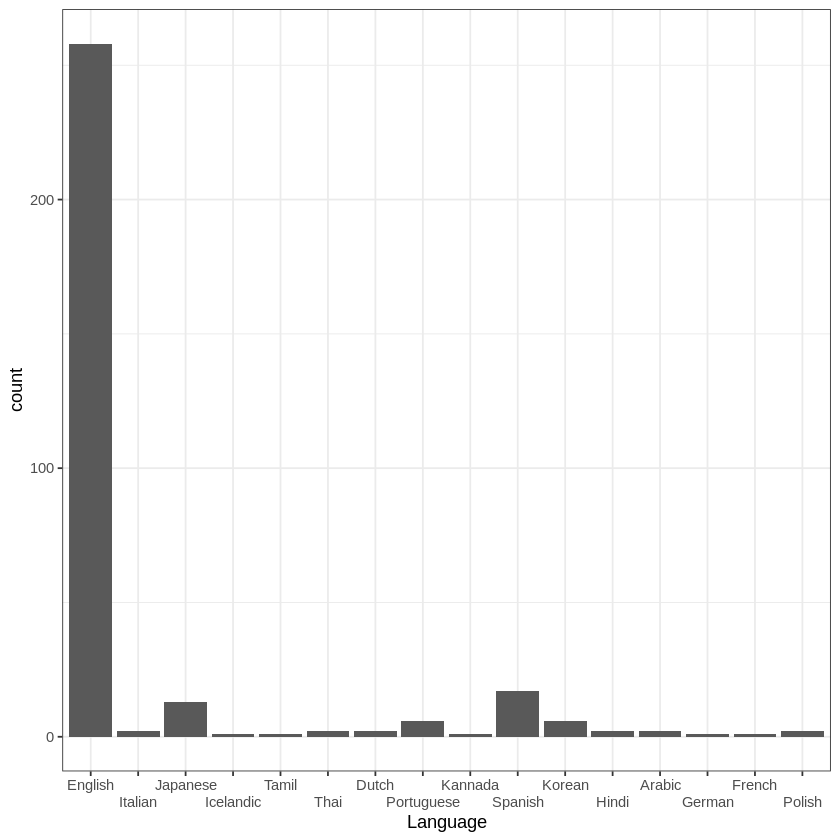

In [33]:
ggplot(netflix, aes(Language)) + geom_bar() + scale_x_discrete(guide = guide_axis(n.dodge= 2)) + theme_bw()

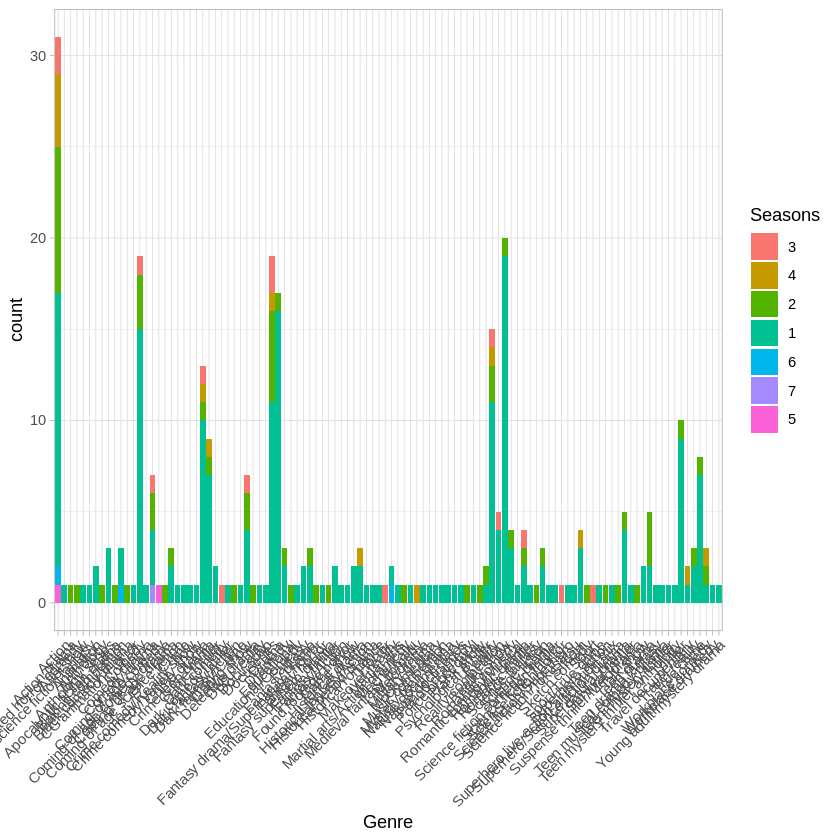

In [34]:
ggplot(netflix, aes(Genre)) + geom_bar(aes(fill= Seasons)) + scale_x_discrete(guide = guide_axis(angle = 45)) + theme_light()